In [88]:
%load_ext autoreload
%autoreload 2

from util import *
from algorithm3copy import algorithm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
import os

file_name=  'STAGE1_10.json'

problem_file = os.path.join("stage1_problems", file_name)
timelimit = 30

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Best obj = 7329.165
Best obj = 6882.581
Best obj = 6853.721
Best obj = 6828.700000000001
Best obj = 6796.800000000001
Best obj = 6764.690000000001
Best obj = 6749.388000000001
Best obj = 6730.535
Best obj = 6700.630000000001
Best obj = 6669.202000000001
Best obj = 6637.402000000001
Best obj = 6605.9935
Best obj = 6574.999999999999
Best obj = 6549.259499999999
Best obj = 6509.406499999999
Best obj = 6475.511999999999
Best obj = 6455.481
Best obj = 6425.241
Best obj = 6387.206999999999
Best obj = 6362.022
Best obj = 6330.2519999999995
Best obj = 6302.1979999999985
Best obj = 6275.012999999998
Best obj = 6250.6979999999985
Best obj = 6217.0419999999995
Best obj = 6192.246999999999
Best obj = 6159.199999999999
Best obj = 6126.805999999999
Best obj = 6099.3094999999985
Best obj = 6073.871999999999
Best obj = 6058.170499999999
Best obj = 6032.989499999999
Best obj = 6003.4169999999995
Best obj = 5994.986
Best obj = 5967.8175
Best obj = 5937.491
Best obj = 5935.085999999999
Best obj = 5934.17

{'total_cost': 667026.0000000001,
 'avg_cost': 3335.1300000000006,
 'num_drivers': 67,
 'total_dist': 309236,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['CAR', [124], [124]],
  ['CAR', [199], [199]],
  ['WALK', [197, 175], [175, 197]],
  ['CAR', [39, 77, 10], [10, 39, 77]],
  ['CAR', [66, 5, 174, 115], [66, 5, 115, 174]],
  ['CAR', [109, 32, 178], [109, 32, 178]],
  ['BIKE', [129, 157, 186, 198], [129, 157, 186, 198]],
  ['BIKE', [161, 190], [161, 190]],
  ['CAR', [43, 104, 51, 60], [43, 104, 60, 51]],
  ['CAR', [105, 152, 171, 192], [105, 152, 171, 192]],
  ['BIKE', [8, 98, 127], [8, 98, 127]],
  ['CAR', [196, 193, 36], [36, 196, 193]],
  ['CAR', [87, 100, 57, 55], [57, 87, 100, 55]],
  ['CAR', [12, 72, 53], [12, 53, 72]],
  ['CAR', [0, 63, 144, 69], [0, 69, 63, 144]],
  ['CAR', [38, 73], [38, 73]],
  ['CAR', [170, 188], [188, 170]],
  ['CAR', [68], [68]],
  ['CAR', [50, 177], [50, 177]],
  ['CAR', [162, 106, 153, 139], [106, 153, 162, 139]],
  ['BIKE', [24, 23], [24, 23

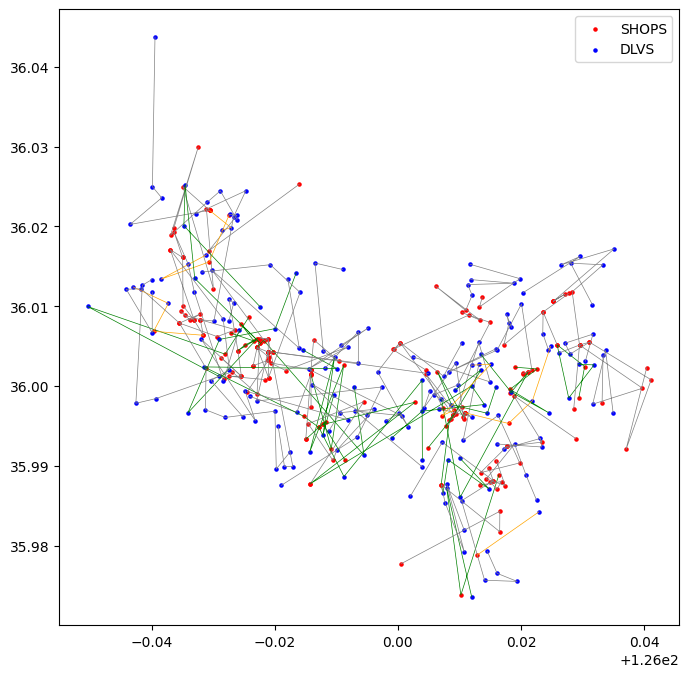

In [143]:
draw_route_solution(ALL_ORDERS, checked_solution)

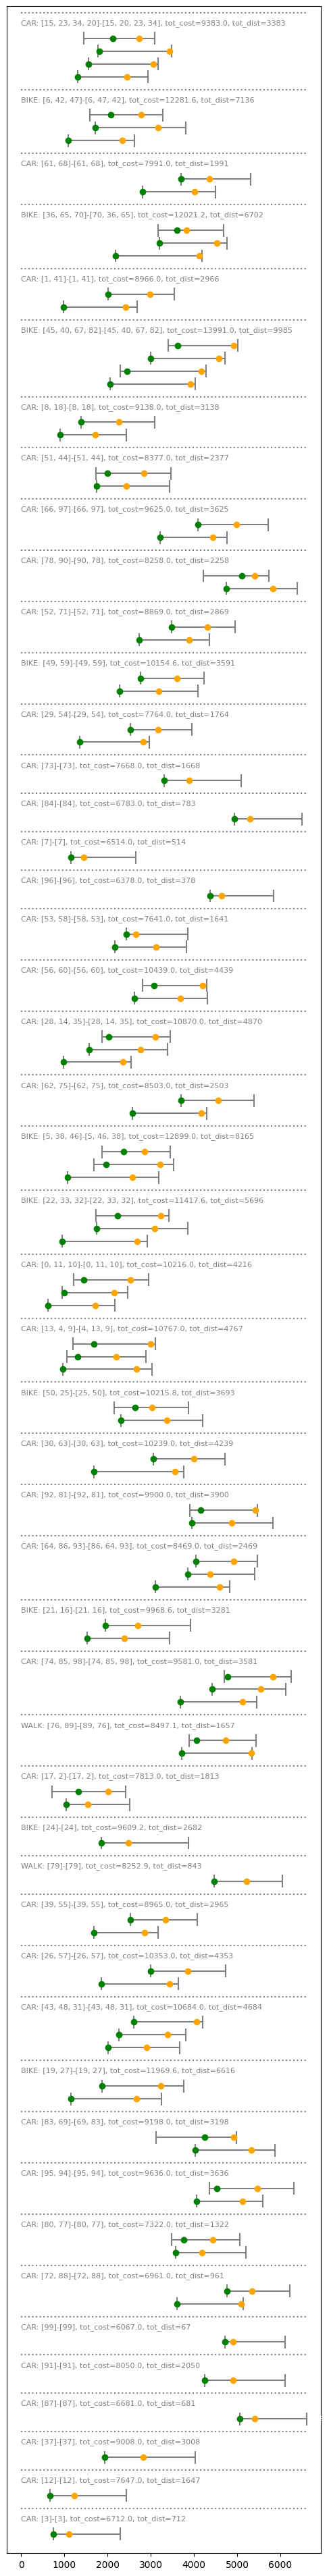

In [112]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)